<a href="https://colab.research.google.com/github/SHAJAKHAN-A/Coca-Cola-Sales-Analysis/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob


# **Load the Dataset**

In [3]:
df = pd.read_csv('/content/chatgpt_reviews.csv')
df.head()


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


## **Data Cleaning**

In [6]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert 'Review Date' to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'], dayfirst=True, errors='coerce')

# Handle missing values
df = df.dropna(subset=['Review', 'Ratings'])

# Basic text cleaning function
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().strip()
    return text

df['Clean_Review'] = df['Review'].apply(clean_text)


/tmp/ipython-input-1934396606.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Review Date'] = pd.to_datetime(df['Review Date'], dayfirst=True, errors='coerce')
/tmp/ipython-input-1934396606.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Review'] = df['Review'].apply(clean_text)


# **Create Calculated Columns**

In [7]:
# Sentiment polarity and subjectivity from TextBlob
df['Polarity'] = df['Clean_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Clean_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Sentiment label
def get_sentiment_label(p):
    if p > 0.2:
        return 'positive'
    elif p < -0.2:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment_Label'] = df['Polarity'].apply(get_sentiment_label)

# Month/Year for temporal analysis
df['Month'] = df['Review Date'].dt.month
df['Year'] = df['Review Date'].dt.year

df.head()


/tmp/ipython-input-3038046181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['Clean_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
/tmp/ipython-input-3038046181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subjectivity'] = df['Clean_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
/tmp/ipython-input-3038046181.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Review Id,Review,Ratings,Review Date,Clean_Review,Polarity,Subjectivity,Sentiment_Label,Month,Year
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,good,0.7,0.600000,positive,8,2024
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,good,0.7,0.600000,positive,8,2024
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,nice app,0.6,1.000000,positive,8,2024
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,nice ig,0.6,1.000000,positive,8,2024
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,this is a great app the bot is so accurate to ...,0.4,0.542949,positive,8,2024


# **Visualization: Insights**

# **Sentiment Distribution**

/tmp/ipython-input-3171187014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sentiment_Label'], order=['positive', 'neutral', 'negative'], palette='husl')


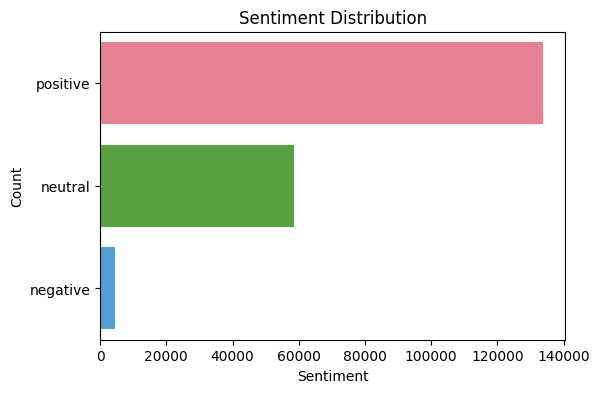

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(df['Sentiment_Label'], order=['positive', 'neutral', 'negative'], palette='husl')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# *Average Rating Over Time*

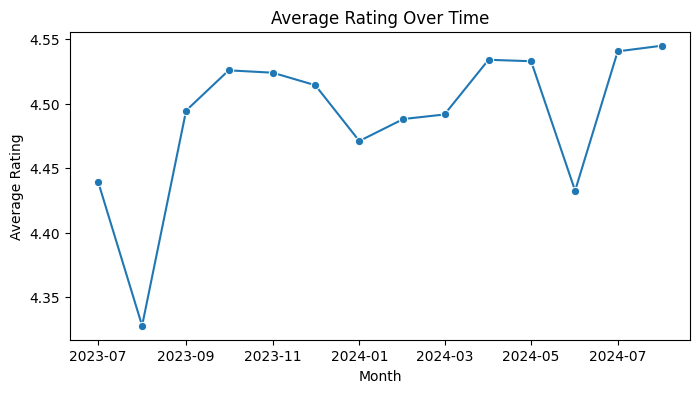

In [10]:
df_monthly = df.groupby(['Year','Month'])['Ratings'].mean().reset_index()
df_monthly['Period'] = pd.to_datetime(df_monthly[['Year','Month']].assign(DAY=1))

plt.figure(figsize=(8,4))
sns.lineplot(x='Period', y='Ratings', data=df_monthly, marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()


# **Polarity vs. Ratings**

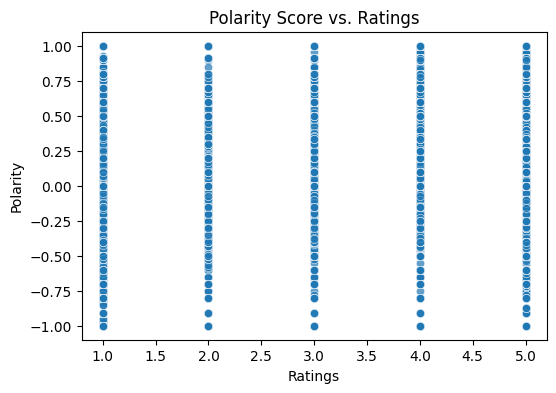

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Ratings', y='Polarity', data=df, alpha=0.7)
plt.title('Polarity Score vs. Ratings')
plt.xlabel('Ratings')
plt.ylabel('Polarity')
plt.show()


# **Most Common Words (Wordcloud)**

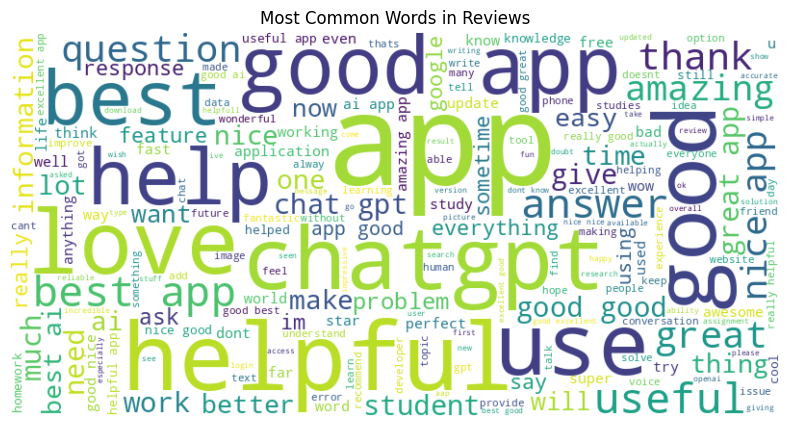

In [12]:
from wordcloud import WordCloud

text = ' '.join(df['Clean_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


# **Ratings vs. Sentiment Label**

/tmp/ipython-input-589409396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Label', y='Ratings', data=df, palette='Set3')


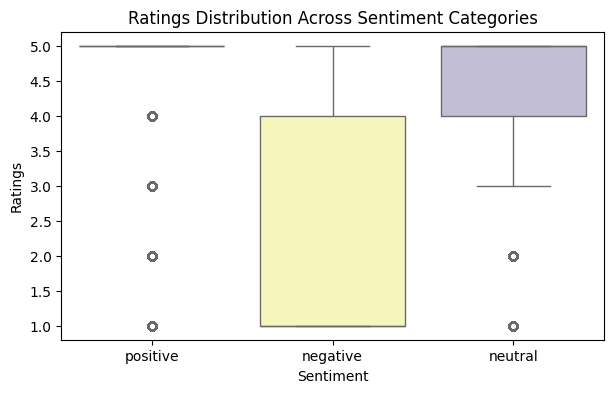

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Sentiment_Label', y='Ratings', data=df, palette='Set3')
plt.title('Ratings Distribution Across Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Ratings')
plt.show()


This chart shows how review ratings vary across sentiment labels (positive, neutral, negative), helping you understand if positive textual sentiment always matches high ratings, and vice versa.

# **Frequency of Reviews by Hour**

/tmp/ipython-input-783496648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Review Date'].dt.hour
/tmp/ipython-input-783496648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='PuBu')


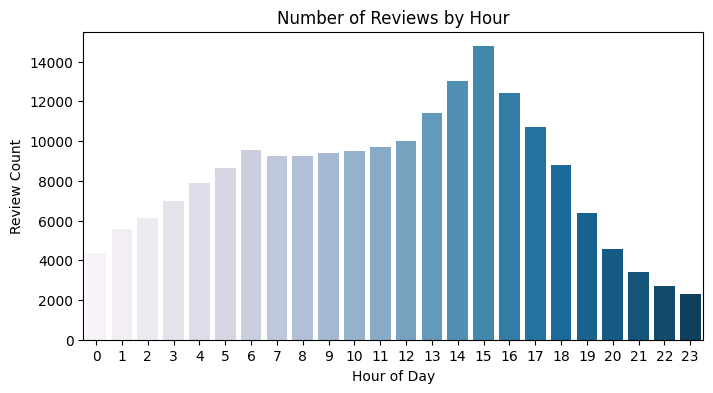

In [14]:
df['Hour'] = df['Review Date'].dt.hour
plt.figure(figsize=(8,4))
sns.countplot(x='Hour', data=df, palette='PuBu')
plt.title('Number of Reviews by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Review Count')
plt.show()


Visualizing reviews by posting time highlights peak activity hours, revealing usage patterns or user engagement throughout the day.

# **Top Reviewers with Multiple Reviews**

/tmp/ipython-input-2478945128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.index, y=top_reviewers.values, palette='Pastel1')


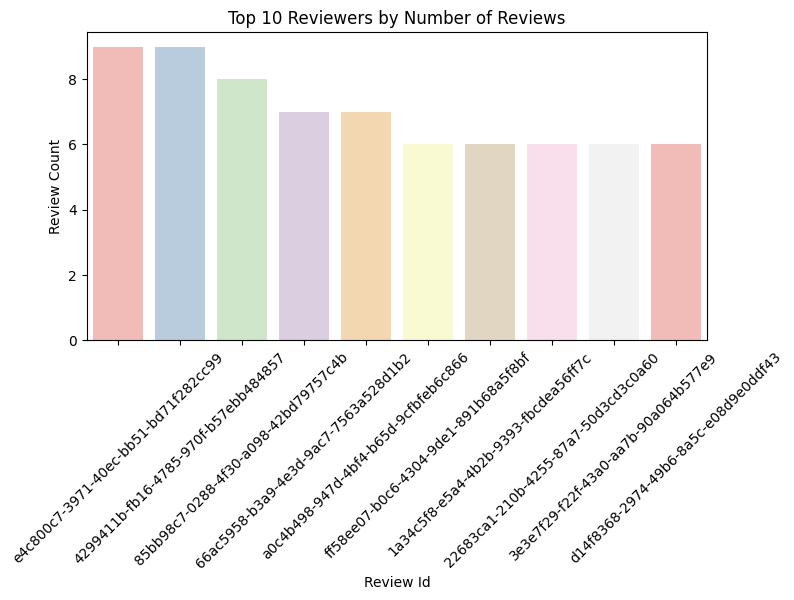

In [15]:
top_reviewers = df['Review Id'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_reviewers.index, y=top_reviewers.values, palette='Pastel1')
plt.xticks(rotation=45)
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('Review Id')
plt.ylabel('Review Count')
plt.show()


This bar plot surfaces reviewers who have left multiple reviews, indicating repeat users, possible feedback trends, or outliers to review volume.